# Training decoder with held subset of data

Split in training and validation set is random at the level of samples.

For the circle dataset, we have 16 * 16 * 32 * 32 samples. Of these, a certain proportion is taken for training - the remaining set for validation.

-> Due to this partition schema, even for very low proportion of training data, each value in each dimension occurs at least once.



In [102]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pickle
from torch.nn import MSELoss

from torchvision import transforms

from models.decoders import decoderBVAE_like_wElu_SigmoidOutput

import sys
sys.path.append("..") # Adds higher directory to python modules path.
from data.dspritesb import dSpriteBackgroundDataset

use_cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if use_cuda else "cpu")

In [103]:
proportion_train_partition = np.array([1., .8, .6, .4, .2, .1])

In [105]:
model = list()
training_stats = list()
partition = list()
datasets_train = list()
datasets_validation = list()

for ii,prop in enumerate(proportion_train_partition):

    model.append(decoderBVAE_like_wElu_SigmoidOutput().to(device))
    model[ii].eval()
    
    checkpoint = torch.load('trained/decoderbvae_like_welu_sigmoidoutput_dsprites_circle_trainPartitionProportion={}_last_200K'.format(prop))
    model[ii].load_state_dict(checkpoint['model_states']['net'])

    training_stats.append(pickle.load(open('trained/decoderbvae_like_welu_sigmoidoutput_dsprites_circle_trainPartitionProportion={}_200K.pkl'.format(prop), 'rb')))

    partition.append(torch.load(open('trained/decoderbvae_like_welu_sigmoidoutput_dsprites_circle_trainPartitionProportion={}_partition_200K'.format(prop), 'rb')))
    
    datasets_train.append(dSpriteBackgroundDataset(partition[ii]['train'],transform=transforms.Resize((32,32)),
                                            shapetype = 'circle'))
    datasets_validation.append(dSpriteBackgroundDataset(partition[ii]['validation'],transform=transforms.Resize((32,32)),
                                            shapetype = 'circle'))

In [106]:
for ii,prop in enumerate(proportion_train_partition):
    print('for prop = {}'.format(prop))
    print('  train      - latents_values.shape: {}'.format(datasets_train[ii].latents_values.shape))
    print('  validation - latents_values.shape: {}'.format(datasets_validation[ii].latents_values.shape))


for prop = 1.0
  train      - latents_values.shape: (262144, 4)
  validation - latents_values.shape: (0, 4)
for prop = 0.8
  train      - latents_values.shape: (209715, 4)
  validation - latents_values.shape: (52429, 4)
for prop = 0.6
  train      - latents_values.shape: (157286, 4)
  validation - latents_values.shape: (104858, 4)
for prop = 0.4
  train      - latents_values.shape: (104857, 4)
  validation - latents_values.shape: (157287, 4)
for prop = 0.2
  train      - latents_values.shape: (52428, 4)
  validation - latents_values.shape: (209716, 4)
for prop = 0.1
  train      - latents_values.shape: (26214, 4)
  validation - latents_values.shape: (235930, 4)


[None, Text(0, 0.5, 'log loss'), Text(0.5, 0, '# of batches')]

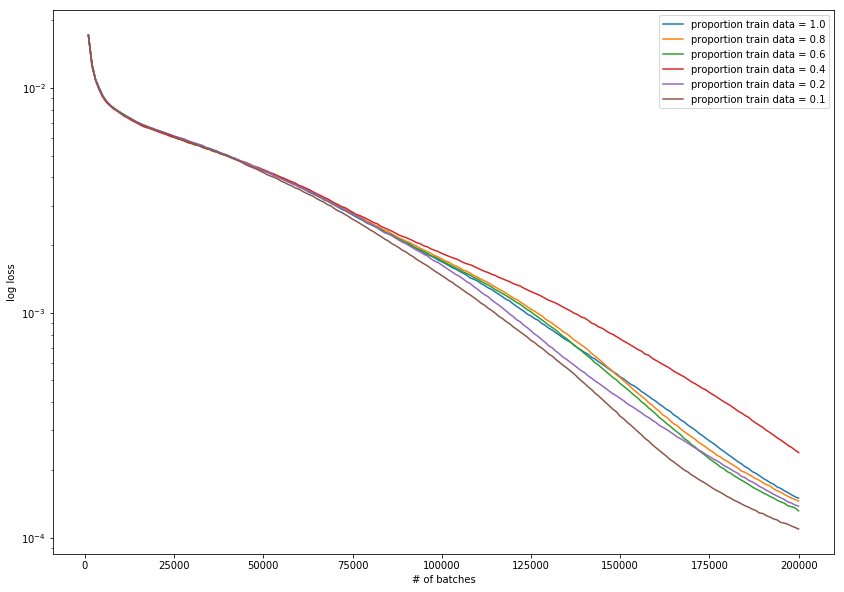

In [107]:
fig, ax = plt.subplots(1,1,sharey=False,sharex=True, figsize=(14,10))

for ii,prop in enumerate(proportion_train_partition):
    ax.plot(training_stats[ii]['iter'], training_stats[ii]['recon_loss'], label='proportion train data = {}'.format(prop))

ax.legend()
ax.set(yscale='log', ylabel='log loss', xlabel='# of batches')


## Visualization

In [108]:
n_grid = 8

x = np.linspace(-.5, 1.5, n_grid)
y = np.linspace(-.5, 1.5, n_grid)

xv, yv = np.meshgrid(x,y, sparse = False)

### Reconstructions for 100% training data

/home/benjamin/anaconda3/envs/deepl10/lib/python3.7/site-packages/torch/nn/functional.py:1332: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


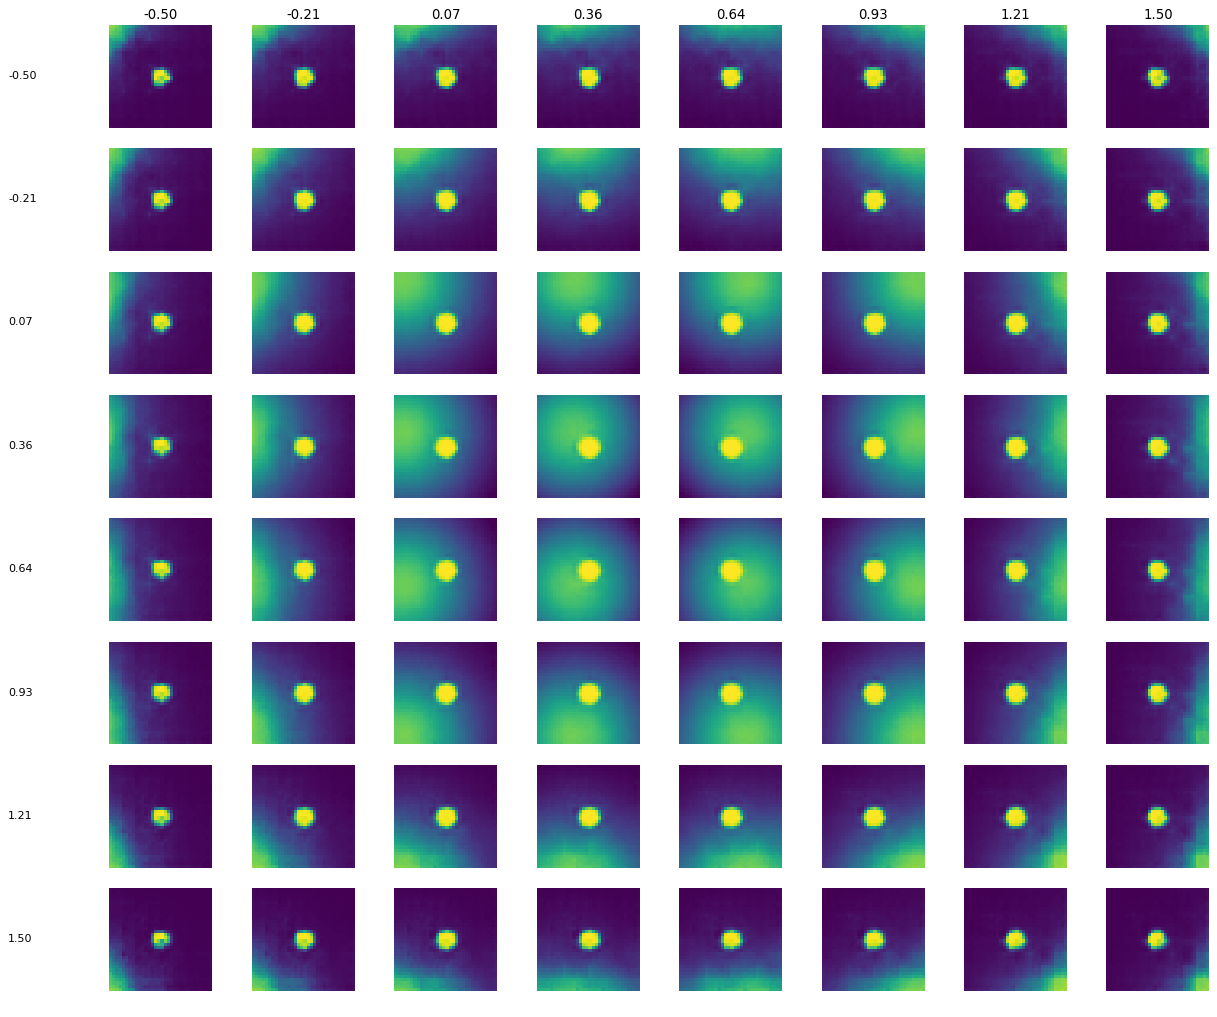

In [109]:
modIdx = 0

fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

latents = torch.Tensor(1,4).to(device)
latents[0, :2] = torch.Tensor([.5, .5])
for ii in range(n_grid):
    for jj in range(n_grid):
        latents[0, 2:] = torch.Tensor([xv[ii,jj], yv[ii,jj]])
        
        plt.subplot(n_grid, n_grid, ii*n_grid + jj + 1)
        plt.imshow(model[modIdx](latents).detach().cpu().numpy().squeeze())
        plt.axis('off')
        if ii == 0:
            plt.title('%0.2f' % y[jj])
        if jj == 0:
            plt.text(-32, 16, '%0.2f' % x[ii])      

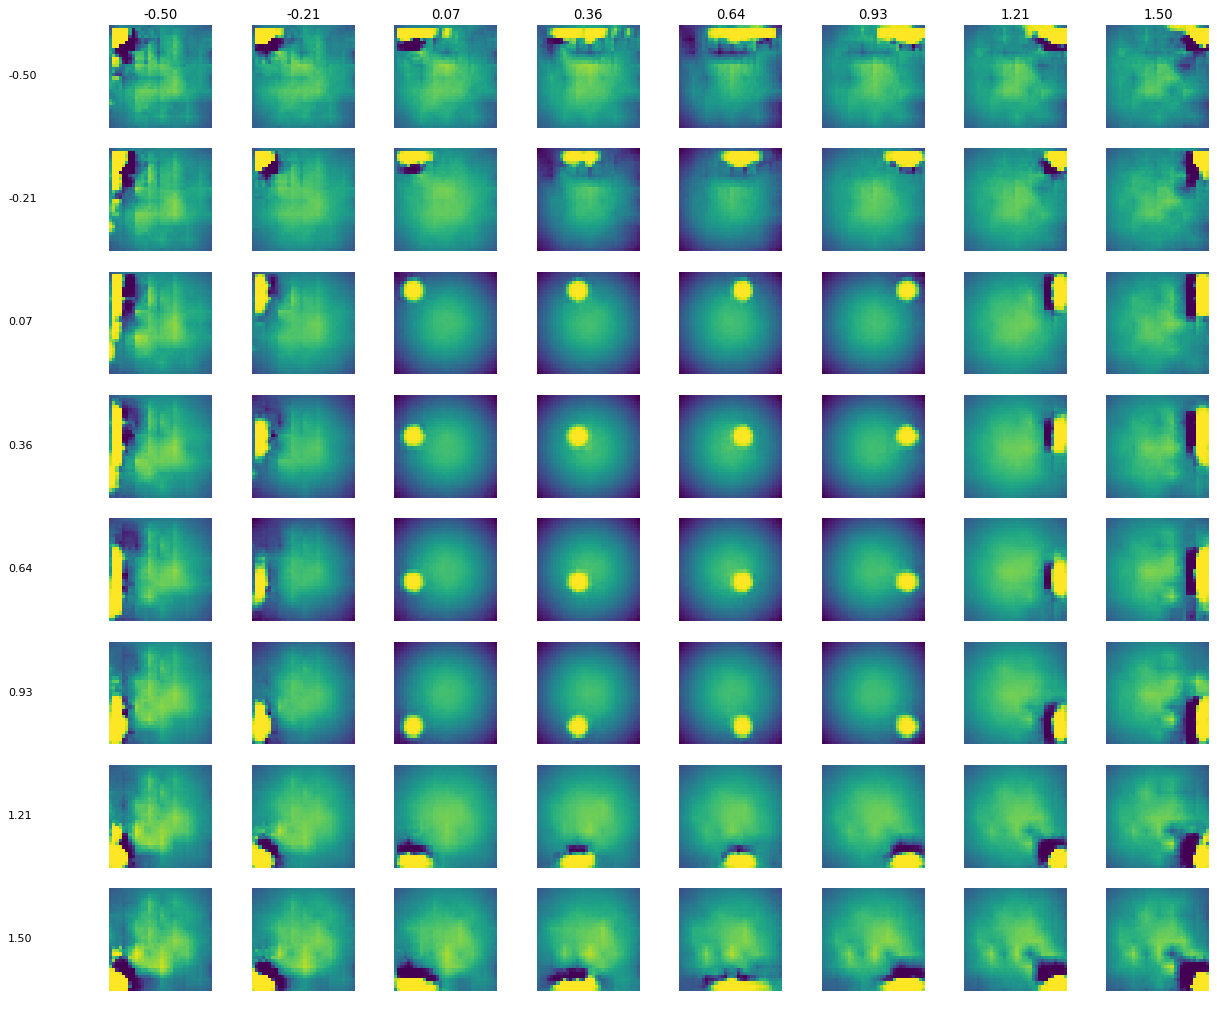

In [21]:
modIdx = 0

fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

latents = torch.Tensor(1,4).to(device)
latents[0, 2:] = torch.Tensor([.5, .5])
for ii in range(n_grid):
    for jj in range(n_grid):
        latents[0, :2] = torch.Tensor([xv[ii,jj], yv[ii,jj]])
        
        plt.subplot(n_grid, n_grid, ii*n_grid + jj + 1)
        plt.imshow(model[modIdx](latents).detach().cpu().numpy().squeeze())
        plt.axis('off')
        if ii == 0:
            plt.title('%0.2f' % y[jj])
        if jj == 0:
            plt.text(-32, 16, '%0.2f' % x[ii])

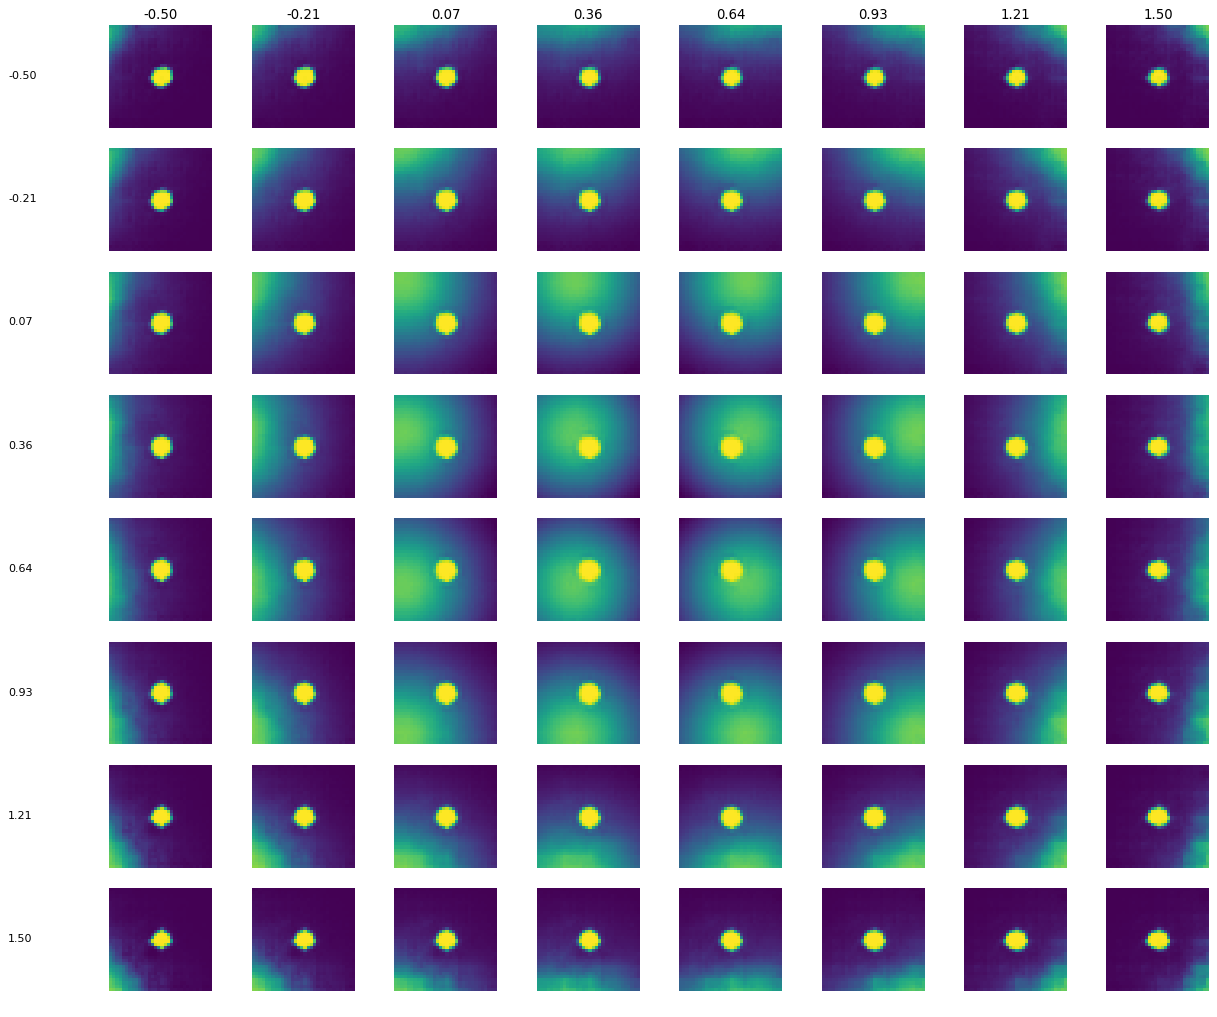

In [110]:
modIdx = 5

fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

latents = torch.Tensor(1,4).to(device)
latents[0, :2] = torch.Tensor([.5, .5])
for ii in range(n_grid):
    for jj in range(n_grid):
        latents[0, 2:] = torch.Tensor([xv[ii,jj], yv[ii,jj]])
        
        plt.subplot(n_grid, n_grid, ii*n_grid + jj + 1)
        plt.imshow(model[modIdx](latents).detach().cpu().numpy().squeeze())
        plt.axis('off')
        if ii == 0:
            plt.title('%0.2f' % y[jj])
        if jj == 0:
            plt.text(-32, 16, '%0.2f' % x[ii])      

### Reconstructions for 20% training data

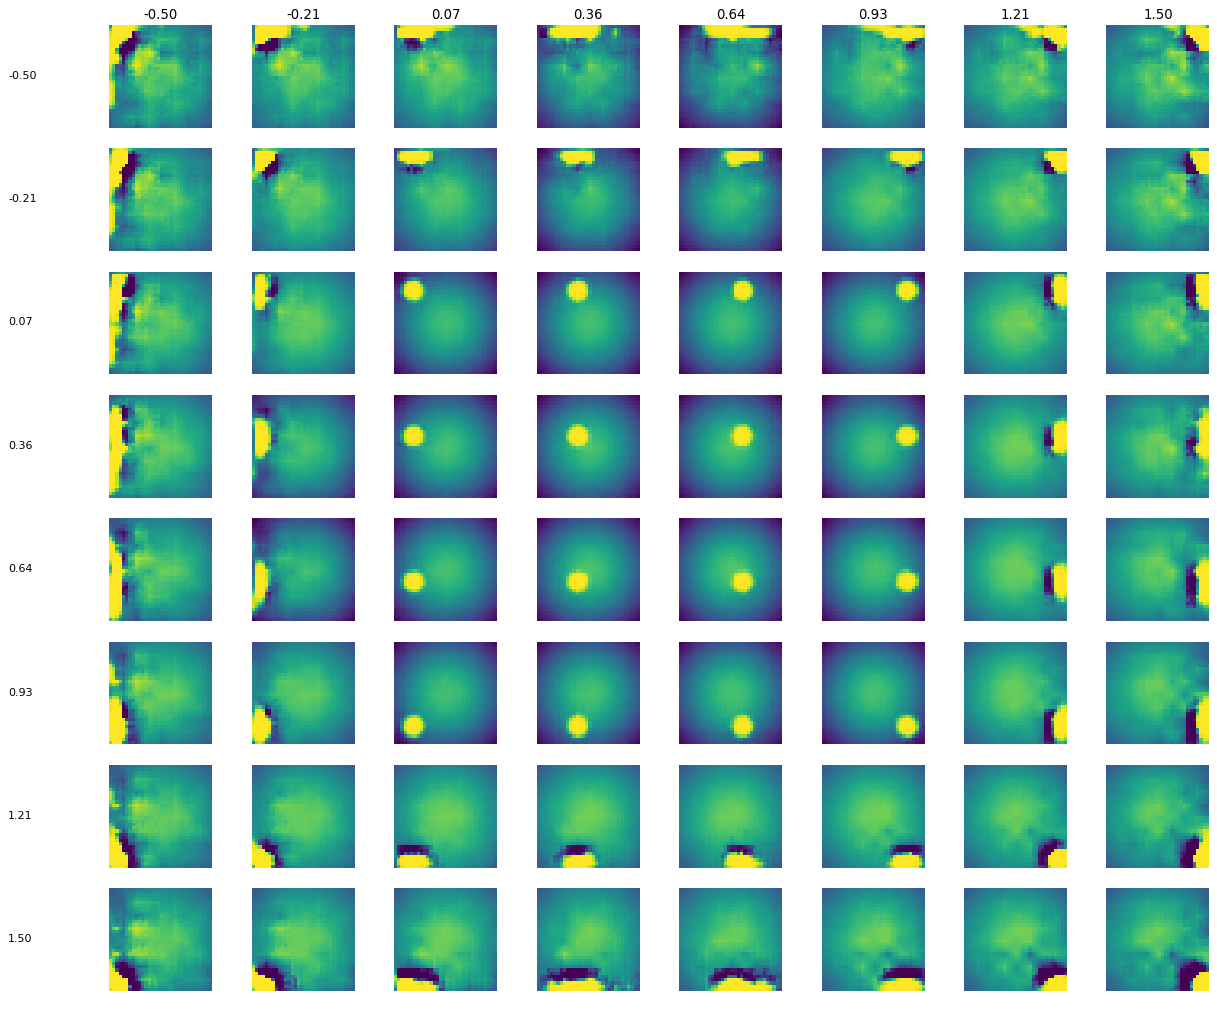

In [111]:
modIdx = 5

fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

latents = torch.Tensor(1,4).to(device)
latents[0, 2:] = torch.Tensor([.5, .5])
for ii in range(n_grid):
    for jj in range(n_grid):
        latents[0, :2] = torch.Tensor([xv[ii,jj], yv[ii,jj]])
        
        plt.subplot(n_grid, n_grid, ii*n_grid + jj + 1)
        plt.imshow(model[modIdx](latents).detach().cpu().numpy().squeeze())
        plt.axis('off')
        if ii == 0:
            plt.title('%0.2f' % y[jj])
        if jj == 0:
            plt.text(-32, 16, '%0.2f' % x[ii])

## Loss in training vs validation set

for each of the trained proportions, compute reconstruction error for training and validation set

In [112]:
loss = MSELoss()

dataloaderparams = {'batch_size': 64,
                    'shuffle': False,
                    'num_workers': 6}


train_loss = np.zeros(len(proportion_train_partition))
validation_loss = np.zeros(len(proportion_train_partition))
train_iter = np.zeros(len(proportion_train_partition))
validation_iter = np.zeros(len(proportion_train_partition))

for ii,_ in enumerate(model):

    data_loader = torch.utils.data.DataLoader(datasets_train[ii], **dataloaderparams)
    for [samples, latents] in data_loader:
        img_batch, code_batch = samples.to(device), latents.to(device)
        predicted_batch = model[ii](code_batch)
        actLoss = loss(predicted_batch, img_batch)

        train_loss[ii] += actLoss.item()/dataloaderparams['batch_size']
        train_iter[ii] += 1.


    data_loader = torch.utils.data.DataLoader(datasets_validation[ii], **dataloaderparams)
    for [samples, latents] in data_loader:
        img_batch, code_batch = samples.to(device), latents.to(device)
        predicted_batch = model[ii](code_batch)
        actLoss = loss(predicted_batch, img_batch)

        validation_loss[ii] += actLoss.item()/dataloaderparams['batch_size']
        validation_iter[ii] += 1.

/home/benjamin/anaconda3/envs/deepl10/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


Text(0.5, 1.0, 'loss training vs validation')

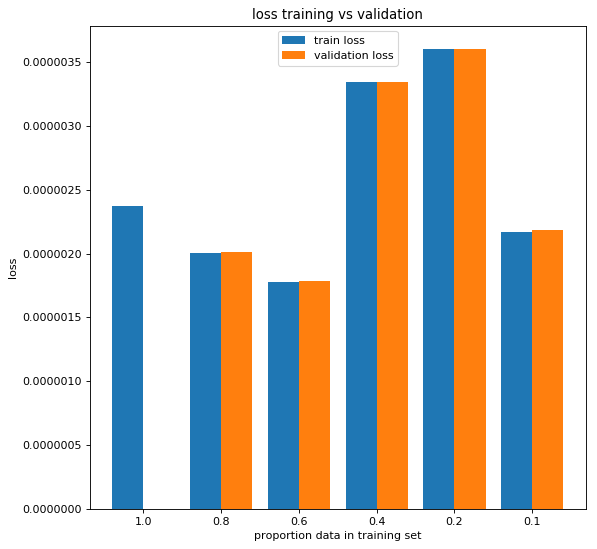

In [113]:
fig,ax=plt.subplots(1,1,figsize=(8, 8), dpi= 80, facecolor='w', edgecolor='k')

ax.bar(2*np.arange(0,len(proportion_train_partition))-.4,  train_loss/train_iter, label='train loss')
ax.bar(2*np.arange(0,len(proportion_train_partition))+.4,  validation_loss/validation_iter, label='validation loss')

ax.set(xticks=2*np.arange(0,len(proportion_train_partition)), xticklabels=(proportion_train_partition))
ax.set(ylabel='loss', xlabel='proportion data in training set')
ax.legend()

plt.title('loss training vs validation')


### summary

- not sure how to interpret the different losses across proportion of training set. Possibly different initialization and the models have not fully converged yet after 200K batches.

- Validation error is of the same size as the training error. If this it not a mistake in the partitioning, this speaks for high generalization. However, the partitioning scheme here involved excluding random samples from the dataset. This excludes individual datapoints from the full combinatorics of the dataset. In each dimension, each value is however revisited multiple times (e.g., all positions x of circle are part of the training set).
